# Лабораторная работа №2

### Используем тот же датасет

Добавим новый аттрибут - оценка за тест по статистике. Считаться он будет так: (Оценка по математике + (Оценка по чтению / 2)) / 2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


file = pd.read_csv("data/StudentsPerformance.csv")

In [2]:
statistic_exam_results = []
for i, row in file.iterrows():
    res = int((row['math score'] + (row['reading score'] / 2)) / 2)
    statistic_exam_results.append(res)

stats = pd.Series(statistic_exam_results)
file.insert(8, 'statistic score', stats)
file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   statistic score              1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [3]:
file.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,statistic score
0,female,group B,bachelor's degree,standard,none,72,72,74,54
1,female,group C,some college,standard,completed,69,90,88,57
2,female,group B,master's degree,standard,none,90,95,93,68
3,male,group A,associate's degree,free/reduced,none,47,57,44,37
4,male,group C,some college,standard,none,76,78,75,57


Аттрибут успешно добавлен

## Теперь почистим данные

In [4]:
clean_file = pd.DataFrame(file.select_dtypes(include=['number']))
clean_file = clean_file.dropna()
clean_file.info()
clean_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   math score       1000 non-null   int64
 1   reading score    1000 non-null   int64
 2   writing score    1000 non-null   int64
 3   statistic score  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


,math score,reading score,writing score,statistic score
0,72,72,74,54
1,69,90,88,57
2,90,95,93,68
3,47,57,44,37
4,76,78,75,57


Успешно убрали все нечисловые и неполные значения, теперь выкинем выбросы

In [5]:
abss = np.abs(clean_file-clean_file.mean())
out_index = 3
clean_file = clean_file[abss < (out_index * clean_file.std())]
clean_file = clean_file.dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(clean_file)
clean_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   math score       993 non-null    float64
 1   reading score    993 non-null    float64
 2   writing score    993 non-null    float64
 3   statistic score  993 non-null    float64
dtypes: float64(4)
memory usage: 38.8 KB


## Теперь построим матрицу графиков рассеивания

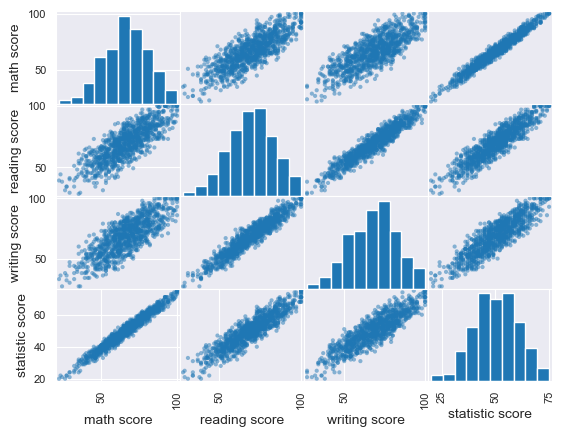

In [6]:
scatter = pd.plotting.scatter_matrix(clean_file)

 ## Найдем зависимости

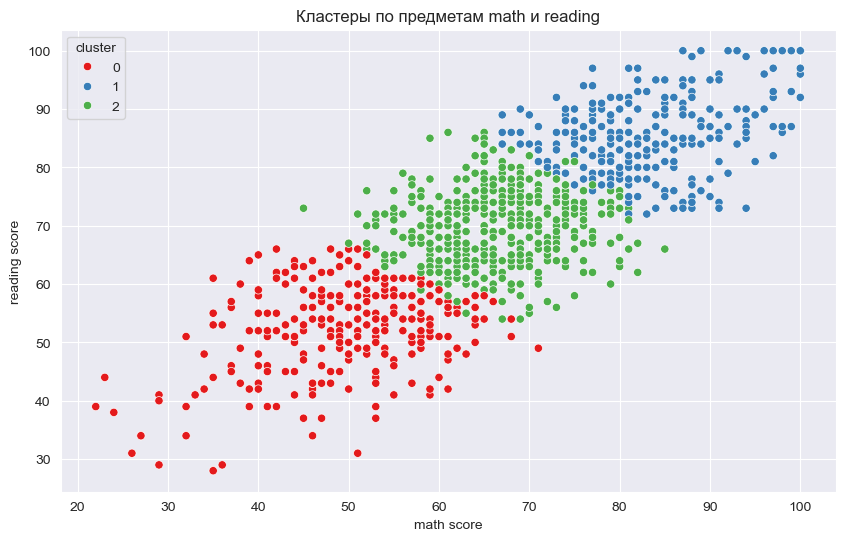

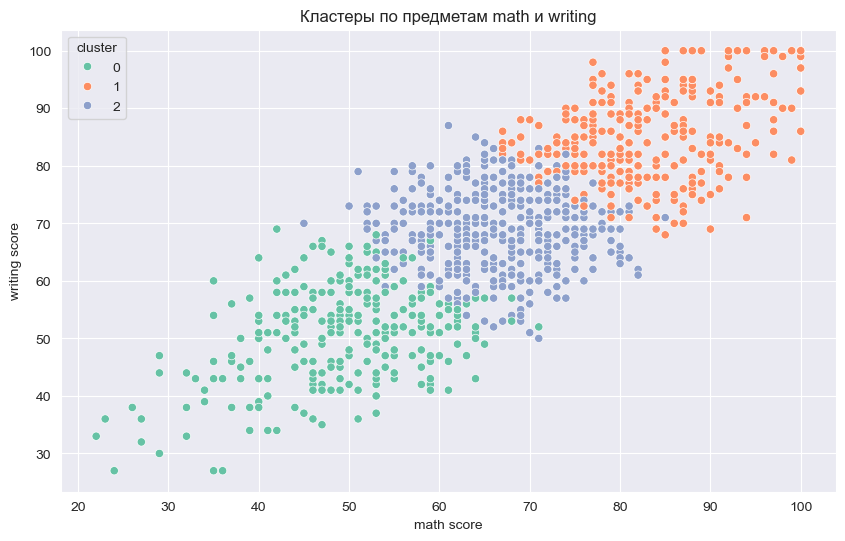

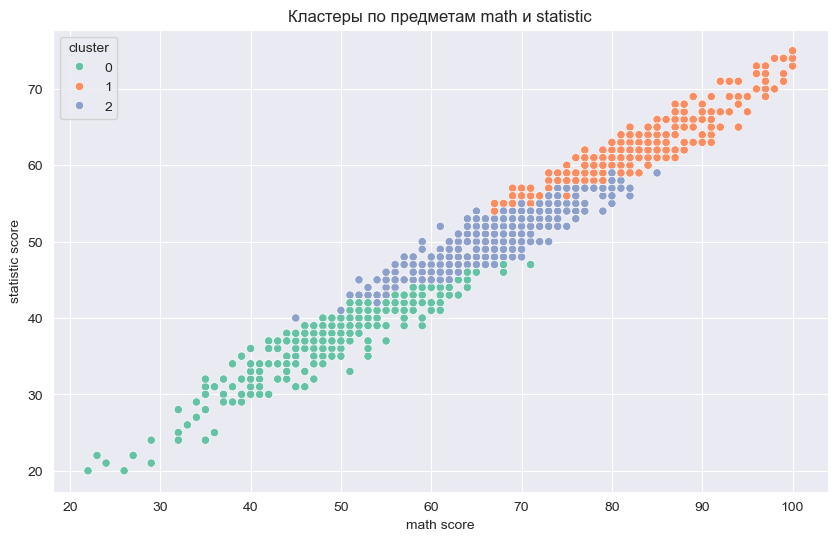

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
clean_file['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='cluster', palette='Set1', data=clean_file)
plt.title('Кластеры по предметам math и reading')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='writing score', hue='cluster', palette='Set2', data=clean_file)
plt.title('Кластеры по предметам math и writing')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='statistic score', hue='cluster', palette='Set2', data=clean_file)
plt.title('Кластеры по предметам math и statistic')
plt.show()

Можно увидеть, что статистика зависит от математики, выстраивается явная линейная зависимость. Она есть и на других предметах, но с большим количеством выбросов.

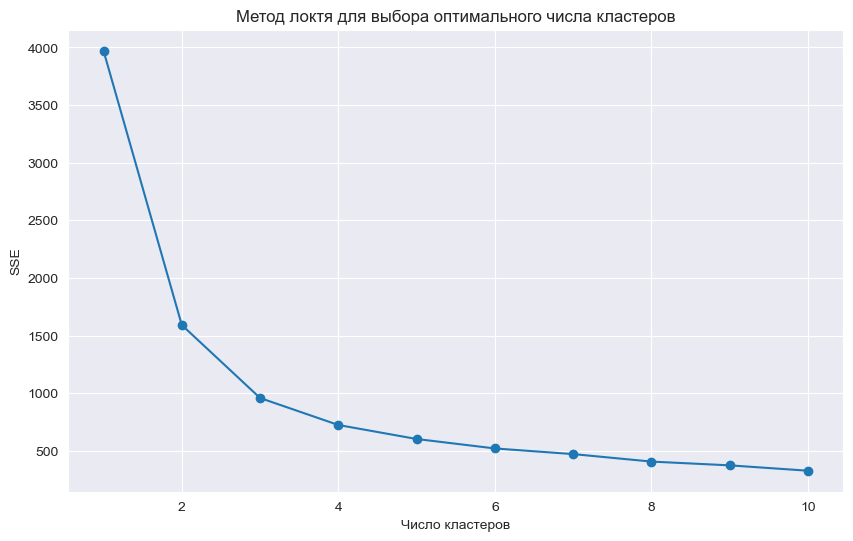

In [8]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Метод локтя для выбора оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('SSE')
plt.show()

Так будет выглядеть KMeans на моем датасете. Можно сказать что 2 кластера оптимальны.

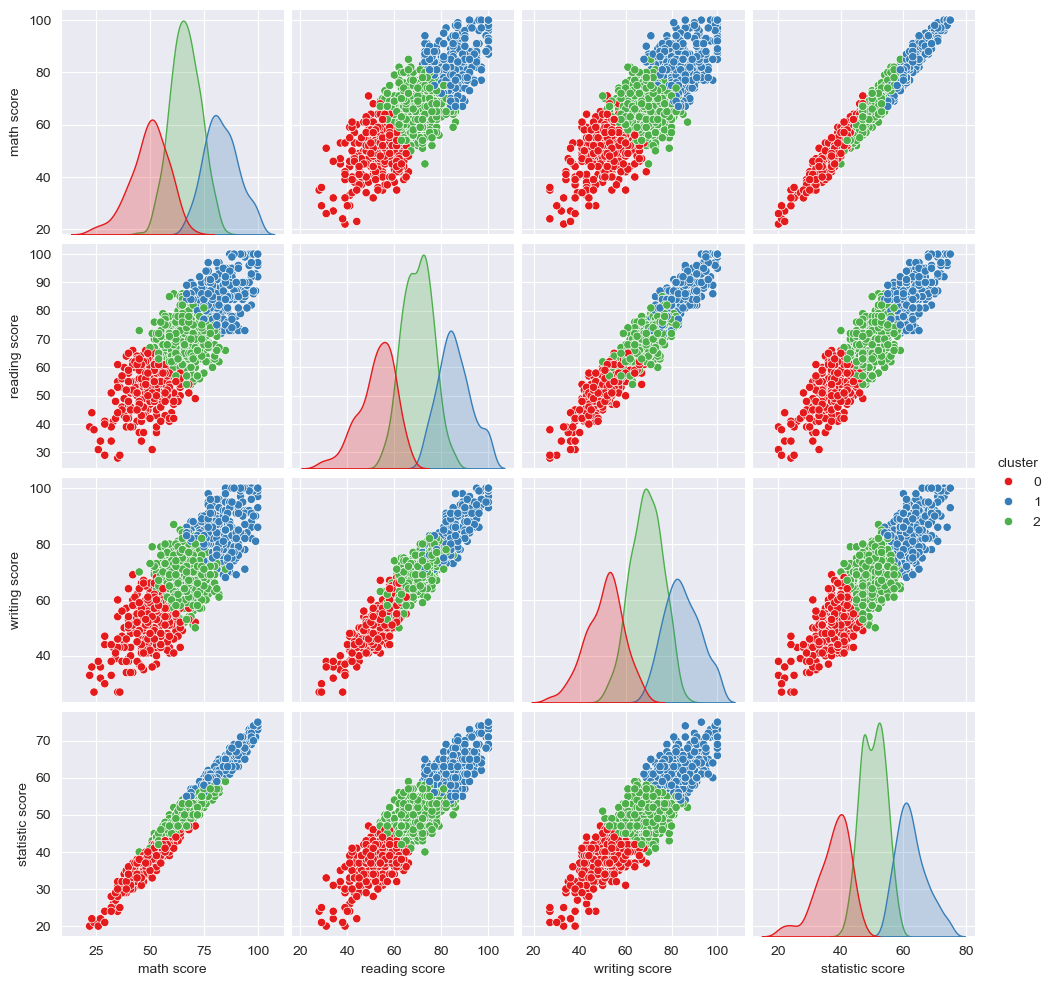

In [9]:
sns.pairplot(clean_file, hue='cluster', palette='Set1')
plt.show()

*Эти графики дают понимание о том, какие переменные и как сильно зависят друг от друга.*
Можно выделить 2 кластера: 
Статистика коррелирует со всеми предметами.
Математика не так сильно как статистика, но коррелирует с чтением и писанием.

## Вывод
По итогу данной лабораторной работы, я добавил новый аттрибут в датасет, очистил его от "плохих" данных. А также выделил пару кластеров использовав при этом такие методы как: матрица рассеивания, KMeans и двойные графики